# Market Segmentation for Airlines

<img src="images/airlines.jpg"/>

Background Information on the Dataset
Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set.

In this problem, we’ll see how clustering can be used to find similar groups of customers who belong to an airline’s frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers.

The file AirlinesCluster.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook “Data Mining for Business Intelligence,” by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see the website for the book.

There are seven different variables in the dataset, described below:

    Balance = number of miles eligible for award travel
    
    QualMiles = number of miles qualifying for TopFlight status
    
    BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
    
    BonusTrans = number of non-flight bonus transactions in the past 12 months
    
    FlightMiles = number of flight miles in the past 12 months
    
    FlightTrans = number of flight transactions in the past 12 months
    
    DaysSinceEnroll = number of days since enrolled in the frequent flyer program

### Problem 1.1 - Normalizing the Data
Read the dataset AirlinesCluster.csv into R and call it "airlines".

**Looking at the summary of airlines, which TWO variables have (on average) the smallest values?**

In [1]:
# Load the dataset

airlines = read.csv("data/AirlinesCluster.csv")

head(airlines)

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,28143,0,174,1,0,0,7000
2,19244,0,215,2,0,0,6968
3,41354,0,4123,4,0,0,7034
4,14776,0,500,1,0,0,6952
5,97752,0,43300,26,2077,4,6935
6,16420,0,0,0,0,0,6942


In [2]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


In [3]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23801   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

In [4]:
a = round(mean(airlines$Balance),2)
b = round(mean(airlines$QualMiles),2)
c = round(mean(airlines$BonusMiles),2)
d = round(mean(airlines$BonusTrans),2)
e = round(mean(airlines$FlightMiles),2)
f = round(mean(airlines$FlightTrans),2)
g = round(mean(airlines$DaysSinceEnroll),2)

var = c(a,b,c,d,e,f,g)

paste(var)

[1] "73601.33" "144.11"   "17144.85" "11.6"     "460.06"   "1.37"     "4118.56"

Answer: "BonusTrans" and "FlightTrans".

**Which TWO variables have (on average) the largest values?**

Answer: "Balance" and "BonusMiles".

### Problem 1.2 - Normalizing the Data
In this problem, we will normalize our data before we run the clustering algorithms. **Why is it important to normalize the data before clustering?**

Answer: If we don’t normalize the data, the clustering will be dominated by the variables that are on a larger scale.

### Problem 1.3 - Normalizing the Data
Let's go ahead and normalize our data. You can normalize the variables in a data frame by using the preProcess function in the "caret" package. You should already have this package installed from Week 4, but if not, go ahead and install it with install.packages("caret"). Then load the package with library(caret).

Now, create a normalized data frame called "airlinesNorm" by running the following commands:

    preproc = preProcess(airlines)

    airlinesNorm = predict(preproc, airlines)

The first command pre-processes the data, and the second command performs the normalization. If you look at the summary of airlinesNorm, you should see that all of the variables now have mean zero. You can also see that each of the variables has standard deviation 1 by using the sd() function.

**In the normalized data, which variable has the largest maximum value?**

In [5]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [6]:
# Preprocess the data

preproc = preProcess(airlines)

airlinesNorm = predict(preproc, airlines)

**The caret package** (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models.

Pre-processing transformation (centering, scaling etc.) can be estimated from the training data and applied to any data set with the same variables.

Example, **Train** function:

<img src="images/carettrain.png"/>

In [7]:
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

Answer: "FlightMiles" now has the largest maximum value.

**In the normalized data, which variable has the smallest minimum value?**

Answer: "DaysSinceEnroll" now has the smallest minimum value.

### Problem 2.1 - Hierarchical Clustering
Compute the distances between data points (using euclidean distance) and then run the Hierarchical clustering algorithm (using method="ward.D") on the normalized data. It may take a few minutes for the commands to finish since the dataset has a large number of observations for hierarchical clustering.

Then, plot the dendrogram of the hierarchical clustering process. Suppose the airline is looking for somewhere between 2 and 10 clusters. **According to the dendrogram, which of the following is NOT a good choice for the number of clusters?**

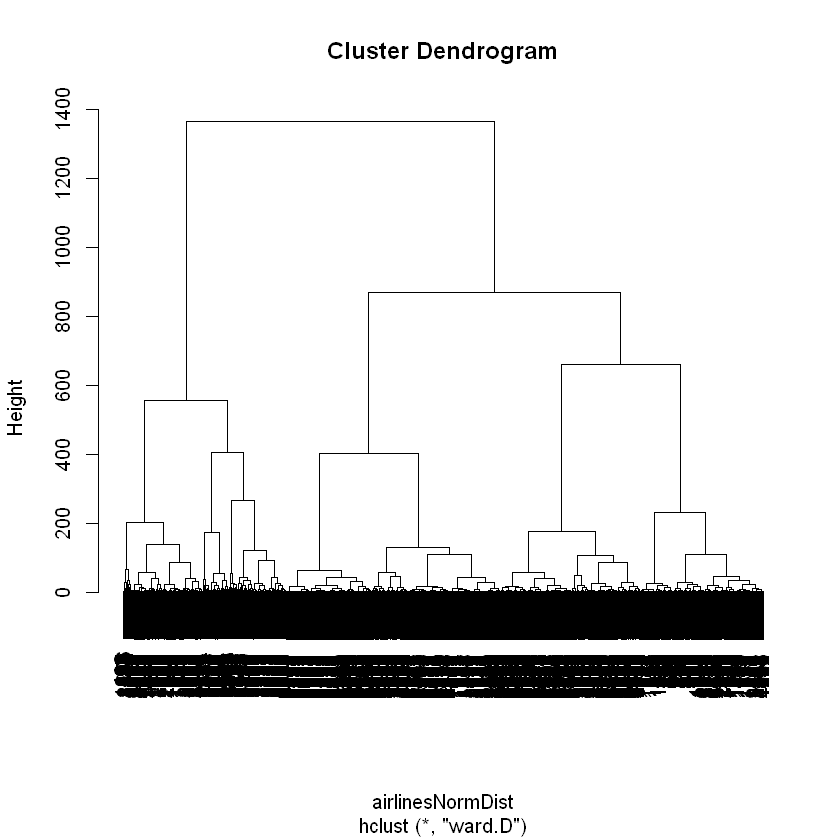

In [8]:
# Hierarchical clustering algorithm

airlinesNormDist = dist(airlinesNorm, method="euclidean")

airlinesNormHierClust = hclust(airlinesNormDist, method="ward.D")

# Plot Dendrogram

plot(airlinesNormHierClust)

Answer: If you run a horizontal line down the dendrogram, you can see that there is a long time that the line crosses 2 clusters, 3 clusters, or 7 clusters. However, it it hard to see the horizontal line cross 6 clusters. This means that 6 clusters is probably not a good choice.

### Problem 2.2 - Hierarchical Clustering
Suppose that after looking at the dendrogram and discussing with the marketing department, the airline decides to proceed with 5 clusters. Divide the data points into 5 clusters by using the cutree function. **How many data points are in Cluster 1?**

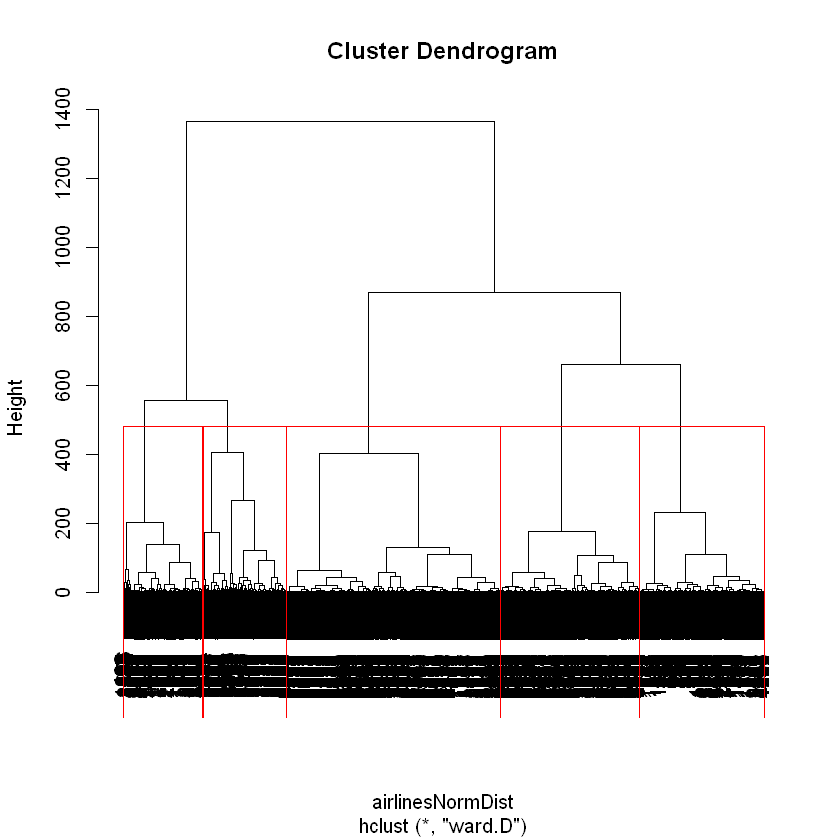

In [9]:
# Plot a dendrogram and divide it into 5 clusters

plot(airlinesNormHierClust)

rect.hclust(airlinesNormHierClust, k = 5, border = "red")

In [10]:
hierGroups = cutree(airlinesNormHierClust, k = 5)

# Subset the clusters into 5 different groups

HierCluster1 = subset(airlinesNorm, hierGroups == 1)
HierCluster2 = subset(airlinesNorm, hierGroups == 2)
HierCluster3 = subset(airlinesNorm, hierGroups == 3)
HierCluster4 = subset(airlinesNorm, hierGroups == 4)
HierCluster5 = subset(airlinesNorm, hierGroups == 5)

In [11]:
# How many data points are in Cluster 1

nrow(HierCluster1)

[1] 776

### Problem 2.3 - Hierarchical Clustering
Now, use tapply to compare the average values in each of the variables for the 5 clusters (the centroids of the clusters). You may want to compute the average values of the unnormalized data so that it is easier to interpret. You can do this for the variable "Balance" with the following command:

    tapply(airlines$Balance, clusterGroups, mean)

**Compared to the other clusters, Cluster 1 has the largest average values in which variables (if any)?**

In [12]:
# Compares two different groups using a statistical measure

tapply(airlines$Balance, hierGroups, mean)

1         2         3         4         5 
 57866.90 110669.27 198191.57  52335.91  36255.91

In [13]:
# Compares two different groups using a statistical measure

tapply(airlines$QualMiles, hierGroups, mean)

1            2            3            4            5 
   0.6443299 1065.9826590   30.3461538    4.8479263    2.5111773

In [14]:
# Compares two different groups using a statistical measure

tapply(airlines$BonusMiles, hierGroups, mean)

1         2         3         4         5 
10360.124 22881.763 55795.860 20788.766  2264.788

In [15]:
# Compares two different groups using a statistical measure

tapply(airlines$BonusTrans, hierGroups, mean)

1         2         3         4         5 
10.823454 18.229287 19.663968 17.087558  2.973174

In [16]:
# Compares two different groups using a statistical measure

tapply(airlines$FlightMiles, hierGroups, mean)

1          2          3          4          5 
  83.18428 2613.41811  327.67611  111.57373  119.32191

In [17]:
# Compares two different groups using a statistical measure

tapply(airlines$FlightTrans, hierGroups, mean)

1         2         3         4         5 
0.3028351 7.4026975 1.0688259 0.3444700 0.4388972

In [18]:
# Compares two different groups using a statistical measure

tapply(airlines$DaysSinceEnroll, hierGroups, mean)

1        2        3        4        5 
6235.365 4402.414 5615.709 2840.823 3060.081

Answer: "DaysSinceEnroll".

**How would you describe the customers in Cluster 1?**

Answer: Customers in Cluster 1 are infrequent but loyal customers.

### Problem 2.4 - Hierarchical Clustering
**Compared to the other clusters, Cluster 2 has the largest average values in which variables (if any)?**

Answer: Cluster 2 has the largest average values in the variables "QualMiles", "FlightMiles" and "FlightTrans". This cluster also has relatively large values in "BonusTrans" and "Balance".

**How would you describe the customers in Cluster 2?**

Anwer: Cluster 2 contains customers with a large amount of miles, mostly accumulated through flight transactions.

### Problem 2.5 - Hierarchical Clustering
**Compared to the other clusters, Cluster 3 has the largest average values in which variables (if any)?**

Answer: Cluster 3 has the largest values in Balance, BonusMiles, and BonusTrans. While it also has relatively large values in other variables, these are the three for which it has the largest values.

**How would you describe the customers in Cluster 3?**

Answer: Cluster 3 mostly contains customers with a lot of miles, and who have earned the miles mostly through bonus transactions.

### Problem 2.6 - Hierarchical Clustering
**Compared to the other clusters, Cluster 4 has the largest average values in which variables (if any)?**

Answer: Cluster 4 does not have the largest values in any of the variables.

**How would you describe the customers in Cluster 4?**

Answer: Cluster 4 customers have the smallest value in DaysSinceEnroll, but they are already accumulating a reasonable number of miles.

### Problem 2.7 - Hierarchical Clustering
**Compared to the other clusters, Cluster 5 has the largest average values in which variables (if any)?**

Answer: Cluster 5 does not have the largest values in any of the variables.

**How would you describe the customers in Cluster 5?**

Answer: Cluster 5 customers have lower than average values in all variables.

### Problem 3.1 - K-Means Clustering
Now run the k-means clustering algorithm on the normalized data, again creating 5 clusters. Set the seed to 88 right before running the clustering algorithm, and set the argument iter.max to 1000.

**How many clusters have more than 1,000 observations?**

In [19]:
# k-means algorithm

set.seed(88)

kmc = kmeans(airlinesNorm, centers=5, iter.max = 1000)

# Subset into 5 different cluster datasets

KmeansCluster1 = subset(airlinesNorm, kmc$cluster == 1)

KmeansCluster2 = subset(airlinesNorm, kmc$cluster == 2)

KmeansCluster3 = subset(airlinesNorm, kmc$cluster == 3)

KmeansCluster4 = subset(airlinesNorm, kmc$cluster == 4)

KmeansCluster5 = subset(airlinesNorm, kmc$cluster == 5)

In [20]:
# Calculates the number of rows in each cluster dataset

paste("# Observations Cluster 1:", nrow(KmeansCluster1))
paste("# Observations Cluster 2:", nrow(KmeansCluster2))
paste("# Observations Cluster 3:", nrow(KmeansCluster3))
paste("# Observations Cluster 4:", nrow(KmeansCluster4))
paste("# Observations Cluster 5:", nrow(KmeansCluster5))

[1] "# Observations Cluster 1: 776"

[1] "# Observations Cluster 2: 57"

[1] "# Observations Cluster 3: 143"

[1] "# Observations Cluster 4: 1373"

[1] "# Observations Cluster 5: 1650"

Answer: 2 Clusters: "Cluster 4" and "Cluster 5".

### Problem 3.2 - K-Means Clustering
Now, compare the cluster centroids to each other either by dividing the data points into groups and then using tapply, or by looking at the output of kmeansClust\\$centers, where "kmeansClust" is the name of the output of the kmeans function. (Note that the output of kmeansClust$centers will be for the normalized data. If you want to look at the average values for the unnormalized data, you need to use tapply like we did for hierarchical clustering.)

**Do you expect Cluster 1 of the K-Means clustering output to necessarily be similar to Cluster 1 of the Hierarchical clustering output?**

In [21]:
# Compares two different groups using a statistical measure

paste("Balance")
tapply(airlines$Balance, kmc$cluster, mean)
paste("QualMiles")
tapply(airlines$QualMiles, kmc$cluster, mean)
paste("BonusMiles")
tapply(airlines$BonusMiles, kmc$cluster, mean)
paste("BonusTrans")
tapply(airlines$BonusTrans, kmc$cluster, mean)
paste("FlightMiles")
tapply(airlines$FlightMiles, kmc$cluster, mean)
paste("FlightTrans")
tapply(airlines$FlightTrans, kmc$cluster, mean)
paste("DaysSinceEnroll")
tapply(airlines$DaysSinceEnroll, kmc$cluster, mean)

[1] "Balance"

1         2         3         4         5 
152879.30 114012.18 191736.34  57416.14  38150.31

[1] "QualMiles"

1          2          3          4          5 
  77.98711 5543.33333  471.56643   55.10415   34.38424

[1] "BonusMiles"

1         2         3         4         5 
51008.089 19196.684 33093.336  8756.787  6745.658

[1] "BonusTrans"

1         2         3         4         5 
21.315722 12.298246 28.356643  9.101238  7.638182

[1] "FlightMiles"

1         2         3         4         5 
 479.9072  939.7719 5763.1329  213.5805  179.6448

[1] "FlightTrans"

1          2          3          4          5 
 1.4574742  2.8245614 16.7692308  0.6460306  0.5551515

[1] "DaysSinceEnroll"

1        2        3        4        5 
4915.534 3872.175 4666.413 5826.598 2283.476

Answer: The clusters are not displayed in a meaningful order, so while there may be a cluster produced by the k-means algorithm that is similar to Cluster 1 produced by the Hierarchical method, it will not necessarily be shown first.